# Project Ohm

In [1]:
import pandas as pd
import statsmodels.formula.api as sm
import statsmodels.stats.sandwich_covariance as sw
import numpy as np
from urllib.request import urlopen
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
d = pd.read_csv("../data/meditation.csv")
d.head()

,ID,Group,Recruited_By,Location,Age_Group,Gender,Religion,Pre_existing_blood_pressure,Years_practice,caffeinated_drinks,...,After_Med_BP_DIA,After_Med_BP_PUL,Post_Med_focus,B4_color_BP_Sys,B4_color_BP_DIA,B4_color_BP_Pul,After_color_BP_Sys,After_color_BP_DIA,After_color_BP_Pul,Enjoy_Coloring
0,1,0,Erika,"San Diego, CA",40-49,F,Buddhist,Low,25,0.5,...,59,59,4.0,108,64,54,94,64,59,2.0
1,2,1,Erika,"Bellingham, WA",40-49,F,Buddhist,Avg,10,2.0,...,61,75,3.0,122,64,79,101,57,75,3.5
2,3,0,Erika,"Lopez Island, WA",50-59,M,Buddhist,Avg,45,2.0,...,73,85,4.0,123,64,79,109,69,83,4.0
3,4,1,Erika,"San Diego, CA",50-59,F,Spiritual,Low,47,1.0,...,71,95,3.0,121,91,100,113,75,93,5.0
4,5,0,Erika,"Redwood City, CA",50-59,F,Buddhist,Avg,24,3.0,...,81,79,4.0,124,79,77,116,65,82,4.0


In [4]:
d.columns

Index(['ID', 'Group', 'Recruited_By', 'Location', 'Age_Group', 'Gender',
       'Religion', 'Pre_existing_blood_pressure', 'Years_practice',
       'caffeinated_drinks', 'hours_since_last_caffeinated_drink',
       'Online_in_person', 'Experiment_Date', 'Start_Time',
       'previous_strenuous_activity', 'Before_Meditation_how_relaxed',
       'B4_Med_BP_Sys', 'B4_Med_BP_DIA', 'B4_Med_BP_PUL', 'After_Med_BP_Sys',
       'After_Med_BP_DIA', 'After_Med_BP_PUL', 'Post_Med_focus',
       'B4_color_BP_Sys', 'B4_color_BP_DIA', 'B4_color_BP_Pul',
       'After_color_BP_Sys', 'After_color_BP_DIA', 'After_color_BP_Pul',
       'Enjoy_Coloring'],
      dtype='object')

In [5]:
# Index 12 corresponds to ID 13, which appears to have been bad data
d=d.drop(d.index[12])

In [6]:
# Creating Pandas Series for Outcomes of Interest
d['HeartRate_C'] = d['After_color_BP_Pul']-d['B4_color_BP_Pul']
d['HeartRate_M'] = d['After_Med_BP_PUL']-d['B4_Med_BP_PUL']

d['Sys_C'] = d['After_color_BP_Sys']-d['B4_color_BP_Sys']
d['Sys_M'] = d['After_Med_BP_Sys']-d['B4_Med_BP_Sys']

d['DIA_C'] = d['After_color_BP_DIA']-d['B4_color_BP_DIA']
d['DIA_M'] = d['After_Med_BP_DIA']-d['B4_Med_BP_DIA']

In [7]:
d['HeartRate_C'].mean()

-1.3548387096774193

In [8]:
d['order_grp'] = d["Group"].astype('category') 
d['recruiter'] = d["Recruited_By"].astype('category')
d['age'] = d['Age_Group'].astype('category')
d['gen'] = d["Gender"].astype('category')
d['rel'] = d["Religion"].astype('category')
d['bp_cat'] = d["Pre_existing_blood_pressure"].astype('category')
d['yrs'] = d["Years_practice"].astype('category')
d['caf'] = d["caffeinated_drinks"].astype('category')
d["hrs_caf"] = d["hours_since_last_caffeinated_drink"].astype('category')
d["in_pers"] = d["Online_in_person"].astype('category')
d['activity'] = d["previous_strenuous_activity"].astype('category')
d['prior_state'] = d["Before_Meditation_how_relaxed"].astype('category')
d["med_foc"] = d['Post_Med_focus'].astype('category')
d['col_enj'] = d["Enjoy_Coloring"].astype('category')

In [9]:
d = d.dropna()
# Need to round the 2.5 number--because it is causing error...
d['med_foc']=d['med_foc'].round()

In [10]:
# Looking at Heart Rate Change after Meditation
# Including caf NOT hrs_caf
Mrob_ols = sm.ols(formula='HeartRate_M ~ order_grp+ recruiter + age + gen + rel + bp_cat + caf + yrs + in_pers + activity + prior_state + med_foc', data=d).fit(cov_type='HC1', use_t=True)
# + med_foc

Mrob_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeartRate_M   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.693e+17
Date:                Sun, 13 Aug 2017   Prob (F-statistic):           5.91e-18
Time:                        02:02:20   Log-Likelihood:                -15.707
No. Observations:                  31   AIC:                             89.41
Df Residuals:                       2   BIC:                             131.0
Df Model:                          28                                         
Covariance Type:                  HC1                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -8.8976      1.000     -8.895      0.012       -13.201    -4.594
order_grp[T.1]             6.8278      0.609     11.204      0.008         4.206     9.450
recruiter[T.Post]          9.5865      2.723      3.521      0.072        -2.129    21.302
recruiter[T.Thong]        -4.9684      1.352     -3.674      0.067       -10.787     0.851
age[T.30-39]              -2.0246      1.937     -1.045      0.406       -10.359     6.310
age[T.40-49]               0.5160      0.657      0.786      0.514        -2.309     3.341
age[T.5-9]                 1.4676      0.837      1.753      0.222        -2.135     5.070
age[T.50-59]              -3.9524      1.562     -2.530      0.127       -10.675     2.770
age[T.60-69]               0.2885      0.597      0.483      0.677        -2.281     2.858
age[T.80-90]              -7.7953      1.107     -7.045      0.020       -12.556    -3.034
gen[T.M]                  -3.9676      3.348     -1.185      0.358       -18.373    10.438
rel[T.Buddhist]            5.4014      0.840      6.433      0.023         1.789     9.014
rel[T.Christian]          -0.7450      1.133     -0.657      0.579        -5.622     4.132
rel[T.Hindu]               5.2284      2.161      2.420      0.137        -4.069    14.526
rel[T.None]                5.7940      1.493      3.880      0.060        -0.631    12.219
rel[T.Spiritual]           0.2399      0.579      0.414      0.719        -2.253     2.732
bp_cat[T.High]            -3.4698      1.192     -2.910      0.101        -8.600     1.660
bp_cat[T.Low]             -6.2861      0.315    -19.961      0.003        -7.641    -4.931
caf[T.0.5]                -6.5260      0.751     -8.691      0.013        -9.757    -3.295
caf[T.1.0]                 0.5000      1.392      0.359      0.754        -5.489     6.489
caf[T.2.0]                 5.9352      2.773      2.140      0.166        -5.997    17.867
caf[T.3.0]                -3.8032      2.133     -1.783      0.217       -12.983     5.376
caf[T.6.0]                -4.2363      1.219     -3.476      0.074        -9.480     1.007
yrs[T.1]                  -4.8204      2.597     -1.856      0.205       -15.996     6.355
yrs[T.2]                   2.6377      1.044      2.525      0.127        -1.856     7.132
yrs[T.10]                -10.9952      2.806     -3.919      0.059       -23.067     1.077
yrs[T.11]                 -9.5945      1.358     -7.067      0.019       -15.436    -3.753
yrs[T.17]                  7.0986      0.967      7.338      0.018         2.936    11.261
yrs[T.24]                 11.0235      1.534      7.186      0.019         4.424    17.624
yrs[T.25]                 10.5475      1.278      8.251      0.014         5.047    16.048
yrs[T.45]                 -1.3712      1.376     -0.996      0.424        -7.292

In [11]:
# Looking at Heart Rate Change after Coloring
# Including caf NOT hrs_caf
rob_ols = sm.ols(formula='HeartRate_C ~ order_grp + recruiter + age + gen + rel + bp_cat + caf + yrs + in_pers + activity + prior_state + col_enj', data=d).fit(cov_type='HC1', use_t=True)
rob_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeartRate_C   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                -9.477e+18
Date:                Sun, 13 Aug 2017   Prob (F-statistic):               1.00
Time:                        02:02:21   Log-Likelihood:                -1.5041
No. Observations:                  31   AIC:                             63.01
Df Residuals:                       1   BIC:                             106.0
Df Model:                          29                                         
Covariance Type:                  HC1                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -2.2799      1.652     -1.380      0.399       -23.267    18.707
order_grp[T.1]            -0.7601      0.567     -1.341      0.408        -7.959     6.439
recruiter[T.Post]         -5.1010      0.303    -16.851      0.038        -8.947    -1.255
recruiter[T.Thong]         4.7015      1.034      4.547      0.138        -8.436    17.839
age[T.30-39]              10.4159      0.018    585.639      0.001        10.190    10.642
age[T.40-49]              -0.8658      1.841     -0.470      0.720       -24.257    22.526
age[T.5-9]                -0.1383      0.784     -0.176      0.889       -10.106     9.829
age[T.50-59]               8.9453      3.936      2.273      0.264       -41.065    58.955
age[T.60-69]               5.1011      1.015      5.027      0.125        -7.793    17.995
age[T.80-90]              17.9414      2.276      7.884      0.080       -10.973    46.855
gen[T.M]                   4.1383      0.784      5.275      0.119        -5.829    14.106
rel[T.Buddhist]            3.1042      1.151      2.697      0.226       -11.520    17.729
rel[T.Christian]          -0.6904      1.510     -0.457      0.727       -19.880    18.499
rel[T.Hindu]              21.9360      4.749      4.619      0.136       -38.412    82.284
rel[T.None]               -5.6271      2.931     -1.920      0.306       -42.869    31.615
rel[T.Spiritual]          -1.5127      1.226     -1.234      0.434       -17.094    14.069
bp_cat[T.High]            10.0537      2.206      4.557      0.138       -17.980    38.087
bp_cat[T.Low]              8.5528      0.346     24.741      0.026         4.160    12.945
caf[T.0.5]                10.0654      1.572      6.403      0.099        -9.909    30.039
caf[T.1.0]               -18.0000      3.937     -4.572      0.137       -68.024    32.024
caf[T.2.0]               -15.1383      3.153     -4.802      0.131       -55.195    24.918
caf[T.3.0]                 3.3442      3.353      0.997      0.501       -39.255    45.943
caf[T.6.0]                -6.6716      1.719     -3.881      0.161       -28.516    15.173
yrs[T.1]                   6.0415      0.562     10.752      0.059        -1.098    13.181
yrs[T.2]                 -27.1433      2.608    -10.409      0.061       -60.277     5.990
yrs[T.10]                  4.5898      1.507      3.046      0.202       -14.555    23.735
yrs[T.11]                -13.8707      3.104     -4.468      0.140       -53.314    25.573
yrs[T.17]                 -4.1042      2.786     -1.473      0.380       -39.504    31.296
yrs[T.24]                -12.8069      0.961    -13.323      0.048       -25.021    -0.593
yrs[T.25]                 -7.2359      1.710     -4.231      0.148       -28.965    14.493
yrs[T.45]                  8.8398      3.688      2.397      0.252       -38.015

# Adjusting To "Cleaner" Categories

### First Clean Up Years Practiced

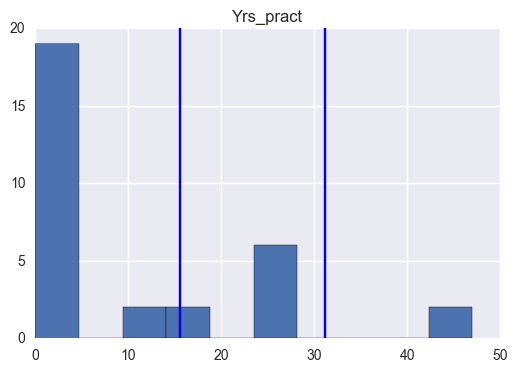

In [12]:
plt.hist(d["Years_practice"], bins=10)
plt.title("Yrs_pract")
plt.axvline(x=15.6)
plt.axvline(x=31.2)
plt.show()

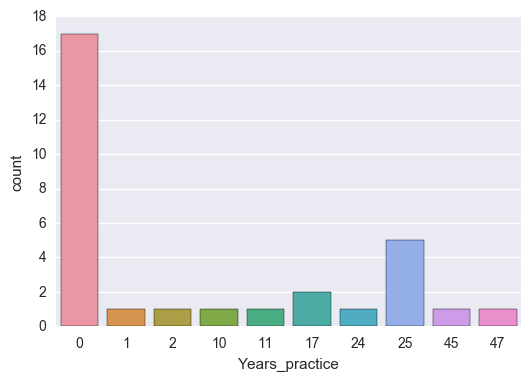

In [13]:
sns.countplot(x="Years_practice", data=d)

In [14]:
# Using function for mapping years
# Played around with different breakdowns, but think this is the most straightforward
# Corresponds to meditation experience or no meditation experience...
def yrMap(x):
    if x<0:
        return "Error"
    if x==0:
        return 0
    else:
        return 1

In [15]:
d['new_yr'] = d["Years_practice"].map(yrMap)

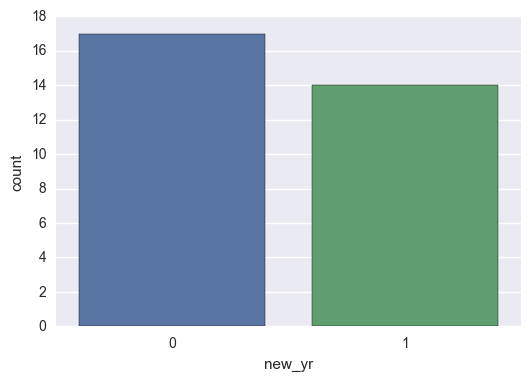

In [16]:
sns.countplot(x="new_yr", data=d)

### Now Clean Up Ages

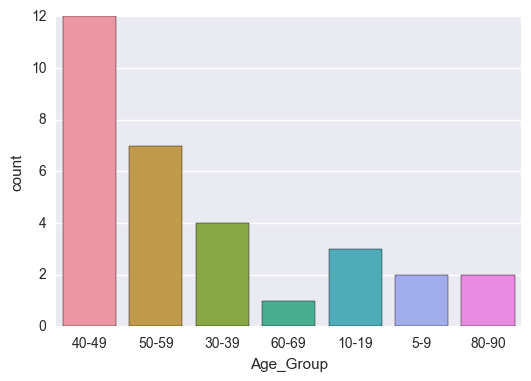

In [17]:
sns.countplot(x="Age_Group", data=d)

In [18]:
# First just clean up what appears to be an error in the data
def ageMap(x):
    if x== '30-40':
        return '30-39'
    if x=='40-50':
        return '40-49'
    if x== '50-60':
        return '50-59'
    else:
        return x

In [19]:
d['new_age'] = d["Age_Group"].map(ageMap)

In [20]:
d['age2'] = d['new_age'].astype('category')

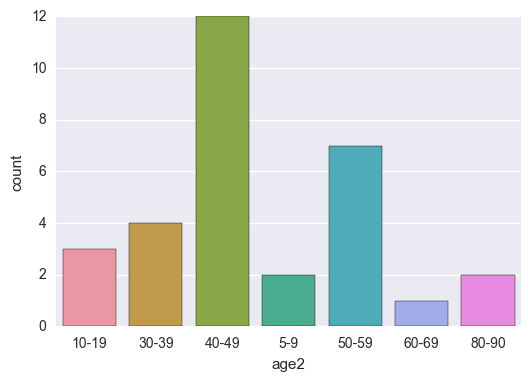

In [21]:
sns.countplot(x="age2", data=d)

C:\Users\mjp05\Anaconda3\lib\site-packages\pandas\core\categorical.py:912: FutureWarning: 
Setting NaNs in `categories` is deprecated and will be removed in a future version of pandas.
  ordered=self.ordered)


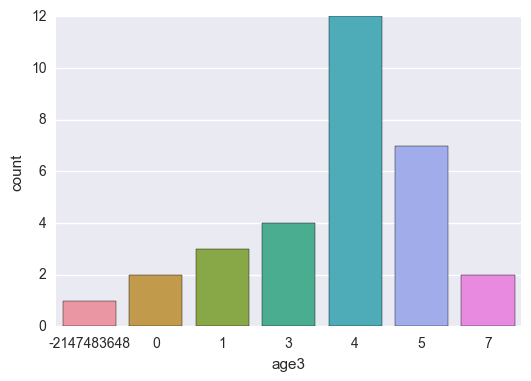

In [22]:
# Mapping years to integers
# Utilize a second map to create a third 'age' series as a set of integers
def ageMap2(x):
    if x=='5-9':
        return 0
    if x=='10-19':
        return 1
    if x=='20-29':
        return 2
    if x=='30-39':
        return 3
    if x=='40-49':
        return 4
    if x=='50-59':
        return 5
    if x=='60-70':
        return 6
    if x=='80-90':
        return 7
d['age3'] = d["age2"].map(ageMap2).astype(int)
sns.countplot(x="age3", data=d)

### Now Clean Up Religion...a monumental effort

In [23]:
# First Catholic to Christian
def relMap(x):
    if x=='Cathollic' or x=='Catholic' or x=='Christian':
        return 'C'
    if x=='Buddhist':
        return 'B'
    if x== 'None':
        return 'None'
    else:
        return 'Other'

In [24]:
d['new_rel'] = d["Religion"].map(relMap)

In [25]:
d['rel2'] = d['new_rel'].astype('category')

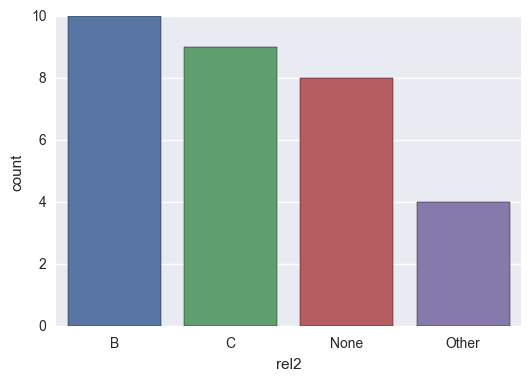

In [26]:
# Plot religious distribution to see break-out:
sns.countplot(x="rel2", data=d)


### Now Clean Up Caffeine

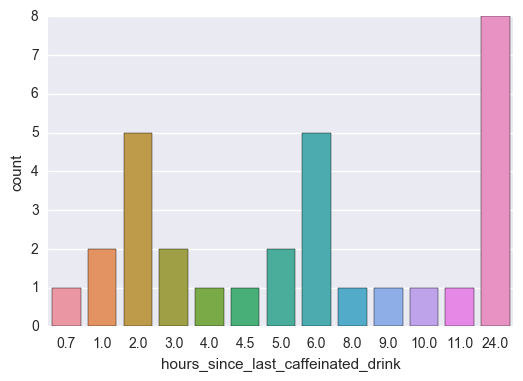

In [27]:
sns.countplot(x='hours_since_last_caffeinated_drink', data=d)

In [28]:
# Ensure higher numbers relate to having caffeine closer to the time of taking the test...
def hcafMap(x):
    if x==24:
        return 0
    else:
        return 11-x

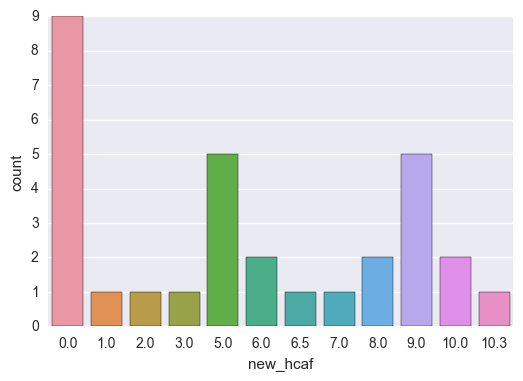

In [29]:
d['new_hcaf'] = d["hours_since_last_caffeinated_drink"].map(hcafMap)
sns.countplot(x='new_hcaf', data=d)

# Clean Up In-Person

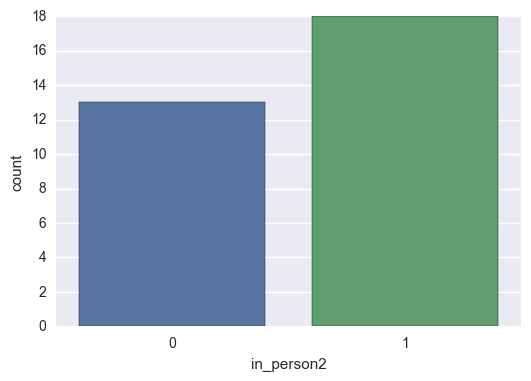

In [30]:
def OImap(x):
    if x=='O':
        return 0
    else:
        return 1

d['in_person2'] = d["Online_in_person"].map(OImap)
sns.countplot(x='in_person2', data=d)

# Clean Up Activity

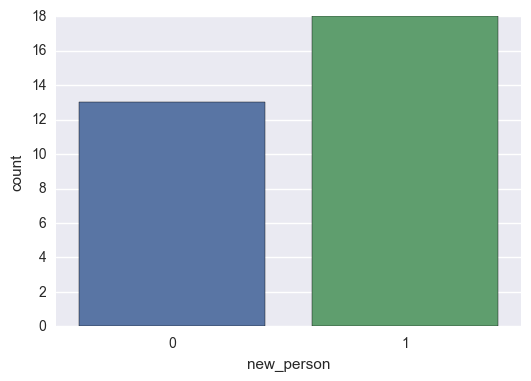

In [31]:
def OImap(x):
    if x=='O':
        return 0
    else:
        return 1

d['new_person'] = d["Online_in_person"].map(OImap)
sns.countplot(x='new_person', data=d)

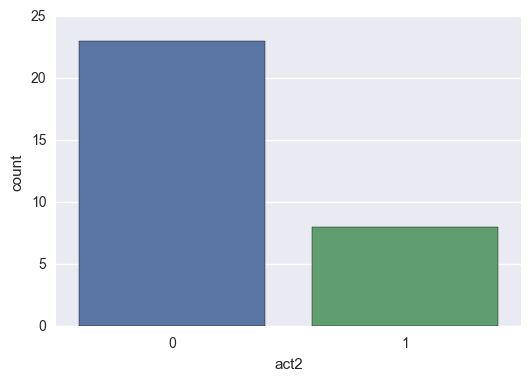

In [32]:
def actMap(x):
    if x == "Yes":
        return 1
    else:
        return 0
    
d['act2'] = d["previous_strenuous_activity"].map(actMap)
sns.countplot(x='act2', data=d)

# Clean Up Previous State:  Relaxed/Tense

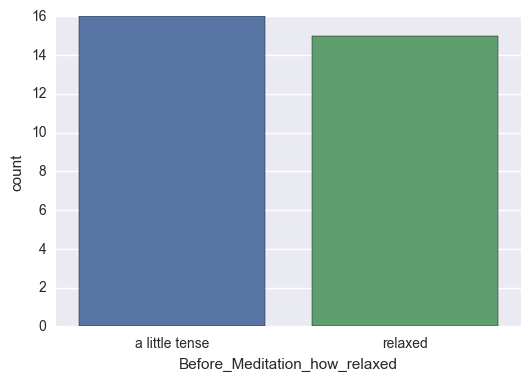

In [33]:
sns.countplot(x='Before_Meditation_how_relaxed', data=d)

In [34]:
# choosing tense as 1 because tension sets up more potential for relaxation...
# challenge: one measurement taken before tests...so the first experiment stage (coloring or meditation)
# may show the most lowering of blood pressure...when coloring comes first, we might expect to see it compete better with meditation
# that is when the subject is tense...then colors...(initial spike already lowered)...then meditation...(less lowering)

def tensorMap(x):
    if x == 'a little tense':
        return 1
    else:
        return 0
    
d['tense2'] = d['Before_Meditation_how_relaxed'].map(tensorMap)

# Running Analysis With Clean(er) Variables

In [35]:
Mrob_ols2 = sm.ols(formula='HeartRate_M ~ order_grp + recruiter + age3 + gen + rel2 + bp_cat + new_hcaf + new_yr + in_person2 + act2 + tense2 + med_foc', data=d).fit(cov_type='HC1', use_t=True)

Mrob_ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeartRate_M   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                 2.062e+10
Date:                Sun, 13 Aug 2017   Prob (F-statistic):           8.51e-70
Time:                        02:03:00   Log-Likelihood:                -76.102
No. Observations:                  31   AIC:                             186.2
Df Residuals:                      14   BIC:                             210.6
Df Model:                          16                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             -4.7756      8.767     -0.545      0.594       -23.578    14.027
order_grp[T.1]         4.3880      2.119      2.070      0.057        -0.158     8.934
recruiter[T.Post]     13.3772      5.714      2.341      0.035         1.121    25.633
recruiter[T.Thong]    -2.2241      2.575     -0.864      0.402        -7.747     3.299
gen[T.M]              -1.8518      1.892     -0.979      0.344        -5.909     2.205
rel2[T.C]             -9.3985      6.332     -1.484      0.160       -22.980     4.183
rel2[T.None]           4.8417      4.858      0.997      0.336        -5.577    15.260
rel2[T.Other]          0.9699      3.252      0.298      0.770        -6.005     7.945
bp_cat[T.High]         6.8432      4.030      1.698      0.112        -1.801    15.487
bp_cat[T.Low]         -3.8612      3.562     -1.084      0.297       -11.500     3.778
age3               -6.016e-10   2.63e-09     -0.229      0.822     -6.25e-09  5.04e-09
new_hcaf              -0.7127      0.385     -1.853      0.085        -1.538     0.112
new_yr                 7.7019      2.524      3.051      0.009         2.288    13.115
in_person2             1.7142      2.521      0.680      0.508        -3.693     7.122
act2                   7.7338      1.746      4.430      0.001         3.990    11.478
tense2                -3.0929      2.333     -1.326      0.206        -8.098     1.912
med_foc                0.4481      1.718      0.261      0.798        -3.237     4.133
==============================================================================
Omnibus:                        0.136   Durbin-Watson:                   3.175
Prob(Omnibus):                  0.934   Jarque-Bera (JB):                0.034
Skew:                           0.056   Prob(JB):                        0.983
Kurtosis:                       2.882   Cond. No.                     5.39e+09
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 5.39e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

d['HeartRate_C'] = d['After_color_BP_Pul']-d['B4_color_BP_Pul']
d['HeartRate_M'] = d['After_Med_BP_PUL']-d['B4_Med_BP_PUL']

d['Sys_C'] = d['After_color_BP_Sys']-d['B4_color_BP_Sys']
d['Sys_M'] = d['After_Med_BP_Sys']-d['B4_Med_BP_Sys']

d['DIA_C'] = d['After_color_BP_DIA']-d['B4_color_BP_DIA']
d['DIA_M'] = d['After_Med_BP_DIA']-d['B4_Med_BP_DIA']

In [36]:
Msys = sm.ols(formula='Sys_M ~ order_grp + recruiter + age3 + gen + rel2 + bp_cat + new_hcaf + new_yr + new_person + act2 + tense2 + med_foc', data=d).fit(cov_type='HC1', use_t=True)

Msys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sys_M   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                 2.284e+13
Date:                Sun, 13 Aug 2017   Prob (F-statistic):           4.16e-91
Time:                        02:03:02   Log-Likelihood:                -91.347
No. Observations:                  31   AIC:                             216.7
Df Residuals:                      14   BIC:                             241.1
Df Model:                          16                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             22.1215     10.408      2.126      0.052        -0.200    44.443
order_grp[T.1]        -0.9627      3.227     -0.298      0.770        -7.884     5.959
recruiter[T.Post]     -5.0308      8.395     -0.599      0.559       -23.037    12.975
recruiter[T.Thong]    -6.5798      5.311     -1.239      0.236       -17.971     4.812
gen[T.M]               2.9721      3.617      0.822      0.425        -4.786    10.730
rel2[T.C]            -11.7868     10.440     -1.129      0.278       -34.179    10.605
rel2[T.None]         -10.0927      3.181     -3.173      0.007       -16.915    -3.270
rel2[T.Other]        -15.5202      5.980     -2.595      0.021       -28.345    -2.695
bp_cat[T.High]        -6.0236      6.105     -0.987      0.341       -19.116     7.069
bp_cat[T.Low]        -14.8777      2.945     -5.051      0.000       -21.195    -8.561
age3               -9.006e-09   4.84e-09     -1.859      0.084     -1.94e-08  1.39e-09
new_hcaf              -0.2977      0.491     -0.607      0.554        -1.350     0.754
new_yr                -7.2681      5.844     -1.244      0.234       -19.802     5.265
new_person            -1.6579      3.157     -0.525      0.608        -8.430     5.114
act2                  -1.7867      3.546     -0.504      0.622        -9.392     5.819
tense2                -3.7082      2.954     -1.255      0.230       -10.043     2.627
med_foc               -2.3005      2.152     -1.069      0.303        -6.916     2.315
==============================================================================
Omnibus:                        0.557   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.056
Skew:                          -0.060   Prob(JB):                        0.973
Kurtosis:                       3.170   Cond. No.                     5.39e+09
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 5.39e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
Mdia = sm.ols(formula='DIA_M ~ order_grp + recruiter + age3 + gen + rel2 + bp_cat + new_hcaf + new_yr + in_person2 + act2 + tense2 + med_foc', data=d).fit(cov_type='HC1', use_t=True)

Mdia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  DIA_M   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     17.82
Date:                Sun, 13 Aug 2017   Prob (F-statistic):           1.26e-06
Time:                        02:03:03   Log-Likelihood:                -84.882
No. Observations:                  31   AIC:                             203.8
Df Residuals:                      14   BIC:                             228.1
Df Model:                          16                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             10.2441     10.385      0.986      0.341       -12.029    32.518
order_grp[T.1]        -4.1585      2.962     -1.404      0.182       -10.510     2.193
recruiter[T.Post]      1.6461      7.886      0.209      0.838       -15.268    18.560
recruiter[T.Thong]    -0.3516      4.529     -0.078      0.939       -10.065     9.362
gen[T.M]              -2.3730      3.686     -0.644      0.530       -10.278     5.532
rel2[T.C]            -16.2627      7.810     -2.082      0.056       -33.013     0.487
rel2[T.None]           4.4974      4.924      0.913      0.377        -6.064    15.059
rel2[T.Other]         -9.4732      4.143     -2.287      0.038       -18.358    -0.588
bp_cat[T.High]         1.2967      4.221      0.307      0.763        -7.757    10.350
bp_cat[T.Low]        -12.4017      3.799     -3.264      0.006       -20.550    -4.253
age3                4.826e-10   3.83e-09      0.126      0.902     -7.74e-09  8.71e-09
new_hcaf              -0.5752      0.484     -1.187      0.255        -1.614     0.464
new_yr                -9.3720      3.494     -2.682      0.018       -16.865    -1.879
in_person2            -3.1757      2.700     -1.176      0.259        -8.967     2.616
act2                  -2.9880      2.837     -1.053      0.310        -9.074     3.098
tense2                 2.2753      2.607      0.873      0.398        -3.316     7.867
med_foc                0.9830      1.971      0.499      0.626        -3.245     5.211
==============================================================================
Omnibus:                        1.722   Durbin-Watson:                   2.353
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                1.197
Skew:                          -0.212   Prob(JB):                        0.550
Kurtosis:                       2.136   Cond. No.                     5.39e+09
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 5.39e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Color Enjoyment

In [38]:
d.columns

Index(['ID', 'Group', 'Recruited_By', 'Location', 'Age_Group', 'Gender',
       'Religion', 'Pre_existing_blood_pressure', 'Years_practice',
       'caffeinated_drinks', 'hours_since_last_caffeinated_drink',
       'Online_in_person', 'Experiment_Date', 'Start_Time',
       'previous_strenuous_activity', 'Before_Meditation_how_relaxed',
       'B4_Med_BP_Sys', 'B4_Med_BP_DIA', 'B4_Med_BP_PUL', 'After_Med_BP_Sys',
       'After_Med_BP_DIA', 'After_Med_BP_PUL', 'Post_Med_focus',
       'B4_color_BP_Sys', 'B4_color_BP_DIA', 'B4_color_BP_Pul',
       'After_color_BP_Sys', 'After_color_BP_DIA', 'After_color_BP_Pul',
       'Enjoy_Coloring', 'HeartRate_C', 'HeartRate_M', 'Sys_C', 'Sys_M',
       'DIA_C', 'DIA_M', 'order_grp', 'recruiter', 'age', 'gen', 'rel',
       'bp_cat', 'yrs', 'caf', 'hrs_caf', 'in_pers', 'activity', 'prior_state',
       'med_foc', 'col_enj', 'new_yr', 'new_age', 'age2', 'age3', 'new_rel',
       'rel2', 'new_hcaf', 'in_person2', 'new_person', 'act2', 'tense2'],
     

In [39]:
d['Enjoy_Coloring']

0     2.0
1     3.5
2     4.0
3     5.0
4     4.0
5     2.0
6     4.0
7     4.0
8     4.0
9     4.0
10    5.0
11    3.0
13    4.0
14    4.0
15    3.5
16    4.0
17    3.0
18    4.0
19    4.0
20    5.0
21    4.0
22    2.0
23    2.0
24    4.0
25    4.0
26    4.0
27    3.0
28    4.0
29    3.0
30    4.0
31    3.0
Name: Enjoy_Coloring, dtype: float64

# Now Do "Difference in Differences"

In [40]:
d['HR_diff'] = d['HeartRate_M'] - d['HeartRate_C']
d['Sys_diff'] = d['Sys_M'] - d['Sys_C']
d['DIA_diff'] = d['DIA_M'] - d['DIA_C']

In [41]:
d['HR_diff'].mean()

1.8709677419354838

In [42]:
HR_diff_ols = sm.ols(formula='HR_diff ~ order_grp + recruiter + age3 + gen + rel2 + bp_cat + new_hcaf + new_yr + in_person2 + act2 + tense2 + med_foc + Enjoy_Coloring', data=d).fit(cov_type='HC1', use_t=True)

HR_diff_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HR_diff   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     3.761
Date:                Sun, 13 Aug 2017   Prob (F-statistic):            0.00982
Time:                        02:03:08   Log-Likelihood:                -90.186
No. Observations:                  31   AIC:                             216.4
Df Residuals:                      13   BIC:                             242.2
Df Model:                          17                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              8.9492     11.959      0.748      0.468       -16.886    34.784
order_grp[T.1]         4.0947      3.902      1.049      0.313        -4.335    12.524
recruiter[T.Post]      5.0429     10.751      0.469      0.647       -18.183    28.269
recruiter[T.Thong]    -7.4710      5.094     -1.467      0.166       -18.475     3.533
gen[T.M]               0.4098      4.651      0.088      0.931        -9.639    10.458
rel2[T.C]             -3.1740      9.785     -0.324      0.751       -24.314    17.966
rel2[T.None]           7.5698      4.876      1.552      0.145        -2.965    18.105
rel2[T.Other]          1.6859      6.502      0.259      0.799       -12.361    15.733
bp_cat[T.High]         5.2853      5.675      0.931      0.369        -6.975    17.546
bp_cat[T.Low]         -9.6054      5.343     -1.798      0.095       -21.148     1.937
age3               -4.435e-10      4e-09     -0.111      0.913     -9.08e-09  8.19e-09
new_hcaf              -0.3958      0.543     -0.729      0.479        -1.568     0.777
new_yr                 7.8818      5.740      1.373      0.193        -4.518    20.282
in_person2            -6.2720      3.471     -1.807      0.094       -13.771     1.227
act2                   9.5435      3.467      2.752      0.016         2.053    17.034
tense2                -3.2974      3.553     -0.928      0.370       -10.974     4.379
med_foc               -4.5452      2.400     -1.894      0.081        -9.731     0.641
Enjoy_Coloring         2.0691      2.116      0.978      0.346        -2.502     6.640
==============================================================================
Omnibus:                        2.360   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.307   Jarque-Bera (JB):                1.834
Skew:                          -0.592   Prob(JB):                        0.400
Kurtosis:                       2.866   Cond. No.                     5.46e+09
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 5.46e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
Sys_diff_ols = sm.ols(formula='Sys_diff ~ order_grp + recruiter + age3 + gen + rel2 + bp_cat + new_hcaf + new_yr + in_person2 + act2 + tense2 + med_foc + Enjoy_Coloring', data=d).fit(cov_type='HC1', use_t=True)

Sys_diff_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Sys_diff   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                 7.577e+11
Date:                Sun, 13 Aug 2017   Prob (F-statistic):           3.52e-75
Time:                        02:03:09   Log-Likelihood:                -102.22
No. Observations:                  31   AIC:                             240.4
Df Residuals:                      13   BIC:                             266.3
Df Model:                          17                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              6.4401     17.704      0.364      0.722       -31.807    44.687
order_grp[T.1]         6.5379      4.808      1.360      0.197        -3.850    16.926
recruiter[T.Post]     12.0136     13.192      0.911      0.379       -16.486    40.513
recruiter[T.Thong]    -7.5714      7.726     -0.980      0.345       -24.263     9.120
gen[T.M]               1.4230      4.935      0.288      0.778        -9.238    12.084
rel2[T.C]            -18.0809     17.037     -1.061      0.308       -54.887    18.725
rel2[T.None]         -15.4359      5.953     -2.593      0.022       -28.296    -2.576
rel2[T.Other]        -17.6307      8.203     -2.149      0.051       -35.353     0.092
bp_cat[T.High]        -9.1645     10.198     -0.899      0.385       -31.197    12.868
bp_cat[T.Low]        -16.9600      6.856     -2.474      0.028       -31.772    -2.148
age3                -1.58e-08   7.23e-09     -2.186      0.048     -3.14e-08 -1.87e-10
new_hcaf              -0.4404      0.677     -0.650      0.527        -1.903     1.022
new_yr                 0.1546      8.266      0.019      0.985       -17.703    18.012
in_person2            -2.3696      4.696     -0.505      0.622       -12.514     7.775
act2                   0.9421      5.293      0.178      0.861       -10.492    12.376
tense2                -5.8618      5.696     -1.029      0.322       -18.166     6.443
med_foc                2.4928      2.687      0.928      0.370        -3.311     8.297
Enjoy_Coloring         0.7169      2.648      0.271      0.791        -5.004     6.438
==============================================================================
Omnibus:                        1.136   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.567   Jarque-Bera (JB):                0.968
Skew:                          -0.200   Prob(JB):                        0.616
Kurtosis:                       2.233   Cond. No.                     5.46e+09
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 5.46e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
DIA_diff_ols = sm.ols(formula='DIA_diff ~ order_grp + recruiter + age3 + gen + rel2 + bp_cat + new_hcaf + new_yr + in_person2 + act2 + tense2 + med_foc + Enjoy_Coloring', data=d).fit(cov_type='HC1', use_t=True)

DIA_diff_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DIA_diff   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                -1.168e+14
Date:                Sun, 13 Aug 2017   Prob (F-statistic):               1.00
Time:                        02:03:11   Log-Likelihood:                -96.766
No. Observations:                  31   AIC:                             229.5
Df Residuals:                      13   BIC:                             255.3
Df Model:                          17                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             14.1416     15.239      0.928      0.370       -18.780    47.063
order_grp[T.1]         3.6871      4.032      0.914      0.377        -5.023    12.398
recruiter[T.Post]     12.1373     11.115      1.092      0.295       -11.876    36.151
recruiter[T.Thong]    -0.6895      6.420     -0.107      0.916       -14.559    13.180
gen[T.M]              -7.6602      7.172     -1.068      0.305       -23.154     7.834
rel2[T.C]            -26.4923     12.058     -2.197      0.047       -52.542    -0.443
rel2[T.None]          -8.4598      7.356     -1.150      0.271       -24.351     7.432
rel2[T.Other]        -10.8216      8.534     -1.268      0.227       -29.257     7.614
bp_cat[T.High]        -1.8315      5.558     -0.330      0.747       -13.840    10.177
bp_cat[T.Low]        -14.8296      7.512     -1.974      0.070       -31.058     1.399
age3               -3.488e-09   6.41e-09     -0.545      0.595     -1.73e-08  1.03e-08
new_hcaf               0.1572      0.732      0.215      0.833        -1.424     1.739
new_yr               -12.8289      5.921     -2.167      0.049       -25.620    -0.037
in_person2            -5.3679      4.669     -1.150      0.271       -15.455     4.719
act2                  -6.0649      3.443     -1.762      0.102       -13.503     1.373
tense2                -1.4450      4.431     -0.326      0.750       -11.017     8.127
med_foc                0.7306      2.524      0.289      0.777        -4.723     6.184
Enjoy_Coloring         1.7887      2.963      0.604      0.557        -4.613     8.191
==============================================================================
Omnibus:                        7.495   Durbin-Watson:                   2.300
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                5.803
Skew:                          -0.899   Prob(JB):                       0.0549
Kurtosis:                       4.123   Cond. No.                     5.46e+09
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 5.46e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# After looking at this, I really think we would have done better with more binary questions or questions with at most 3 answers...

# Really, the only insights of this study are related to how we would restructure the study in order to implement an effective study of this type

# Though there are a couple of interesting data points, when looking at this many different data points, we may expect one or two to be significant even by chance.  The various insights again just add more speculation that we may want to test with a new hypothesis and experiment

In [45]:
d.DIA_diff.mean()

-0.16129032258064516

In [46]:
d.Sys_diff.mean()

2.064516129032258

In [47]:
d.HR_diff.mean()

1.8709677419354838

In [51]:
columns = d.columns
for i in columns[1:]:
    print(i, d.groupby(i).DIA_diff.mean())

Group Group
0   -1.058824
1    0.928571
Name: DIA_diff, dtype: float64
Recruited_By Recruited_By
Erika   -1.416667
Post    -2.428571
Thong    2.416667
Name: DIA_diff, dtype: float64
Location Location
Bellingham, WA           9.000000
Farmerville, LA         -2.428571
Huntington Beach, Ca     6.000000
Irvine, CA               4.000000
Lopez Island, WA        -2.000000
MA                     -12.000000
Oakland, CA              2.000000
Palo Alto, CA           -6.400000
Redwood City, CA        14.000000
San Diego, CA          -11.000000
San Francisco           -8.000000
San Francisco, CA        8.666667
San Jose, CA             0.500000
Sausalito, CA           12.000000
Name: DIA_diff, dtype: float64
Age_Group Age_Group
10-19    -8.000000
30-39    -2.000000
40-49     2.583333
5-9      -0.500000
50-59     1.571429
60-69   -12.000000
80-90    -1.000000
Name: DIA_diff, dtype: float64
Gender Gender
F   -0.250000
M   -0.105263
Name: DIA_diff, dtype: float64
Religion Religion
Agnostic     -2.00

In [52]:
for i in columns[1:]:
    print(i, d.groupby(i).Sys_diff.mean())

Group Group
0    1.647059
1    2.571429
Name: Sys_diff, dtype: float64
Recruited_By Recruited_By
Erika    1.500000
Post     6.428571
Thong    0.083333
Name: Sys_diff, dtype: float64
Location Location
Bellingham, WA          24.000000
Farmerville, LA          6.428571
Huntington Beach, Ca     2.333333
Irvine, CA               9.000000
Lopez Island, WA        22.000000
MA                      11.000000
Oakland, CA             -6.000000
Palo Alto, CA           -5.400000
Redwood City, CA        10.000000
San Diego, CA          -10.000000
San Francisco            0.000000
San Francisco, CA        3.666667
San Jose, CA            -8.000000
Sausalito, CA            0.000000
Name: Sys_diff, dtype: float64
Age_Group Age_Group
10-19    -1.333333
30-39     0.500000
40-49     0.750000
5-9      15.500000
50-59     2.857143
60-69    11.000000
80-90    -2.500000
Name: Sys_diff, dtype: float64
Gender Gender
F    2.500000
M    1.789474
Name: Sys_diff, dtype: float64
Religion Religion
Agnostic    -23.00

In [54]:
for i in columns[1:]:
    print(i, d.groupby(i).HR_diff.mean())

Group Group
0   -0.058824
1    4.214286
Name: HR_diff, dtype: float64
Recruited_By Recruited_By
Erika    4.750000
Post     4.428571
Thong   -2.500000
Name: HR_diff, dtype: float64
Location Location
Bellingham, WA           5.000000
Farmerville, LA          4.428571
Huntington Beach, Ca    -2.666667
Irvine, CA              25.000000
Lopez Island, WA         3.000000
MA                      -3.000000
Oakland, CA              3.000000
Palo Alto, CA           -0.200000
Redwood City, CA        -1.000000
San Diego, CA            2.000000
San Francisco           -8.000000
San Francisco, CA       -8.000000
San Jose, CA             3.500000
Sausalito, CA           22.000000
Name: HR_diff, dtype: float64
Age_Group Age_Group
10-19    4.666667
30-39    9.250000
40-49   -0.416667
5-9      9.000000
50-59   -0.571429
60-69   -3.000000
80-90    0.500000
Name: HR_diff, dtype: float64
Gender Gender
F    4.500000
M    0.210526
Name: HR_diff, dtype: float64
Religion Religion
Agnostic     2.000000
Buddhist